In [2]:
from ads_tools import Ads
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_context('paper')

In [3]:
flats_sale = Ads('flat_sale')

In [4]:
flats_sale.filter_and_transform_to_df(min_price = 30000.00, max_price=5000000.0,size_limit=300.0)

Dataset transfromed to a DataFrame and formatted
NA values removed from columns: 'price', 'date'


In [5]:
print(flats_sale)

Ads dataset class. Number of observations: 92037, Number of variables: 13


In [6]:
dataset = flats_sale.filtered_data

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91847 entries, 1001294070520910468328209 to 1002152500010911274471309
Data columns (total 13 columns):
adress          91754 non-null object
price           91847 non-null float64
date            91847 non-null datetime64[ns]
n_rooms         91562 non-null float64
n_bath          40143 non-null float64
location        91847 non-null object
advertiser      90896 non-null object
desc            91847 non-null object
parking         33665 non-null object
type            91847 non-null object
street_regex    39338 non-null object
size_m2         91847 non-null float64
url             91847 non-null object
dtypes: datetime64[ns](1), float64(4), object(8)
memory usage: 9.8+ MB


In [8]:
dataset.head(2)

,adress,price,date,n_rooms,n_bath,location,advertiser,desc,parking,type,street_regex,size_m2,url
1001294070520910468328209,Wrzeciono,305000.0,2017-09-06,2.0,NaN,Bielany,agency,BIELANY – ładny rozkład mieszkania – 2pok – 47...,None,Mieszkanie,None,47.0,https://www.gumtree.pl/a-mieszkania-i-domy-spr...
1001294070590910468328209,Josepha Conrada,390000.0,2017-09-26,3.0,NaN,Bielany,agency,Bielany – 3 pokoje 60m – po remoncie do wejści...,None,Mieszkanie,None,60.0,https://www.gumtree.pl/a-mieszkania-i-domy-spr...


In [9]:
dataset.reset_index(inplace=True)

In [10]:
cols = ['price','advertiser','n_rooms','n_bath','location','size_m2','parking']
dataset = dataset[cols]

In [11]:
dataset.head()

,price,advertiser,n_rooms,n_bath,location,size_m2,parking
0,305000.0,agency,2.0,NaN,Bielany,47.0,None
1,390000.0,agency,3.0,NaN,Bielany,60.0,None
2,397000.0,agency,3.0,NaN,Mokotow,54.0,None
3,341000.0,agency,3.0,NaN,Bielany,51.0,None
4,283000.0,agency,2.0,NaN,Bielany,35.0,None


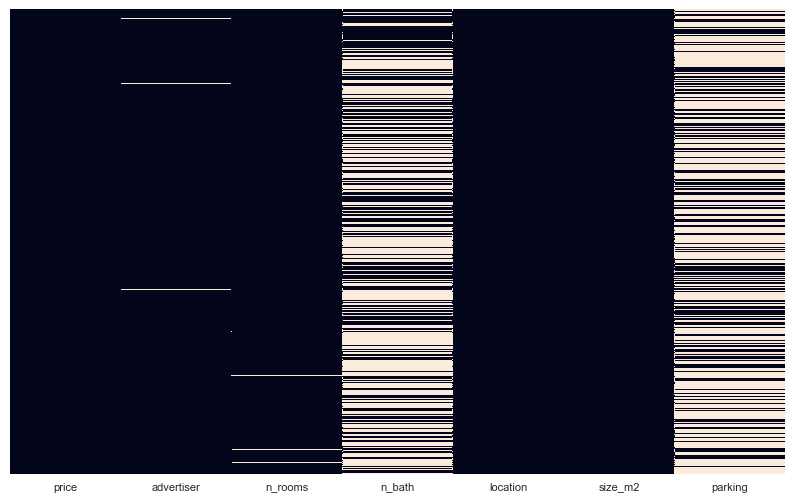

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.isnull(),cbar=False,yticklabels=False)
plt.show()

In [13]:
values = {'n_bath': 1.0, 'parking': 'no'}
dataset = dataset.fillna(value=values)

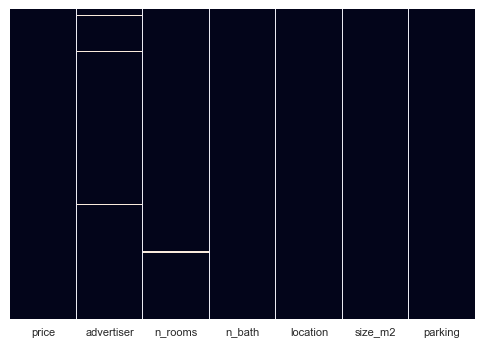

In [14]:
sns.heatmap(dataset.isnull(),cbar=False,yticklabels=False)
plt.show()

In [15]:
dataset.dropna(inplace=True)

Change price units to thousand PLN and calculate price per square meter

In [16]:
dataset['price'] = dataset['price']/1000.0
dataset['price_m2'] = dataset['price']/dataset['size_m2']

In [17]:
dataset.head(2)

,price,advertiser,n_rooms,n_bath,location,size_m2,parking,price_m2
0,305.0,agency,2.0,1.0,Bielany,47.0,no,6.489362
1,390.0,agency,3.0,1.0,Bielany,60.0,no,6.500000


Remove ads with price per square meter higher than PLN 25k

In [18]:
dataset = dataset[dataset['price_m2']<25.0]

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90427 entries, 0 to 91846
Data columns (total 8 columns):
price         90427 non-null float64
advertiser    90427 non-null object
n_rooms       90427 non-null float64
n_bath        90427 non-null float64
location      90427 non-null object
size_m2       90427 non-null float64
parking       90427 non-null object
price_m2      90427 non-null float64
dtypes: float64(5), object(3)
memory usage: 6.2+ MB


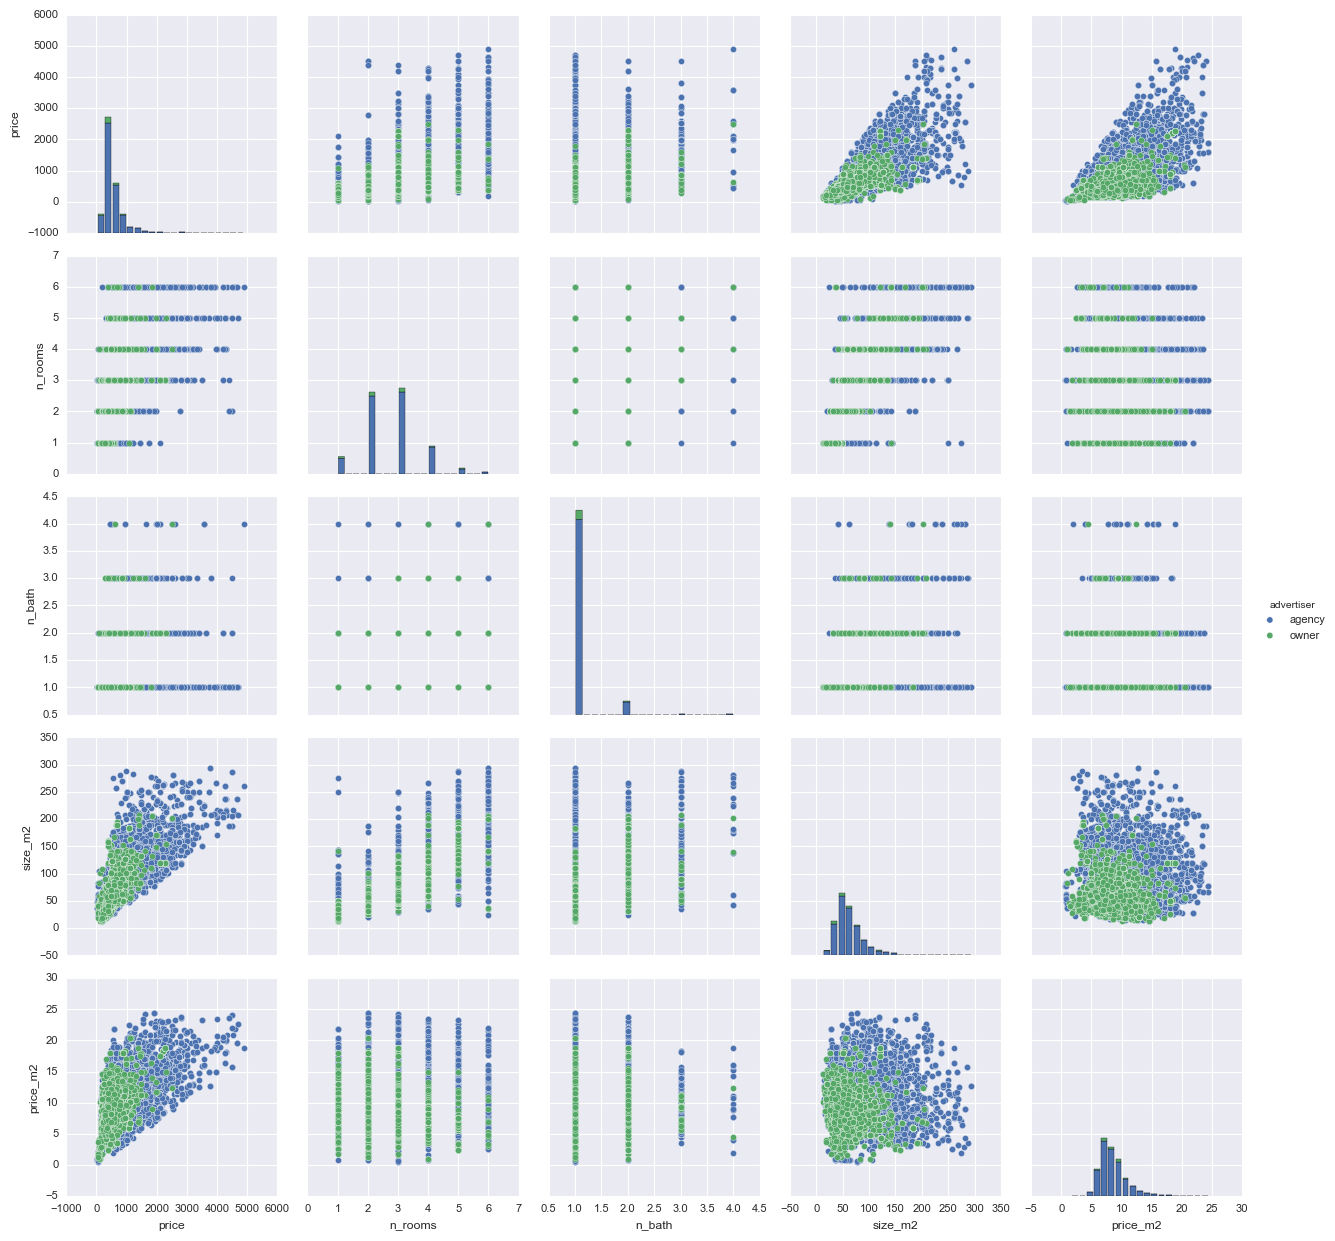

In [20]:
sns.pairplot(dataset,hue='advertiser', diag_kws=dict(bins=20))
plt.show()

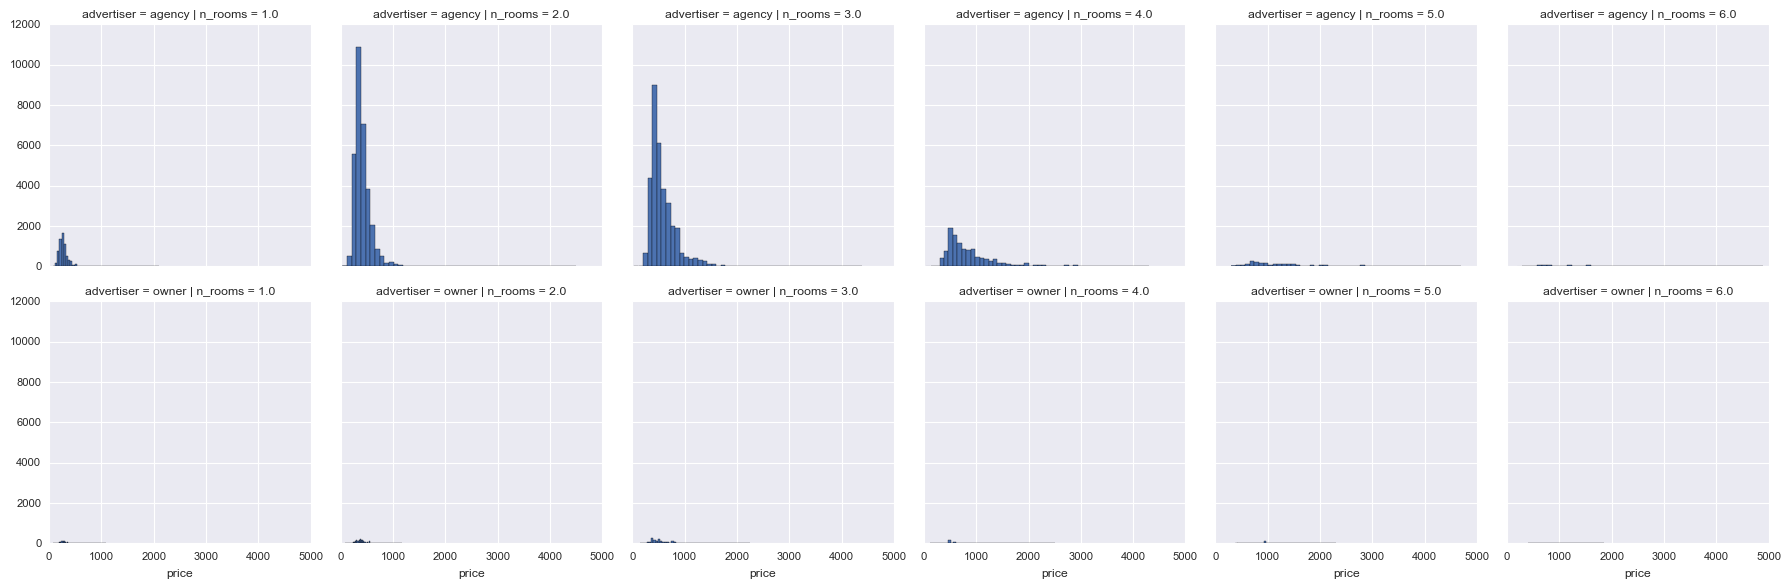

In [21]:
g = sns.FacetGrid(dataset,col='n_rooms',row='advertiser')
g.map(plt.hist,'price',bins=50)

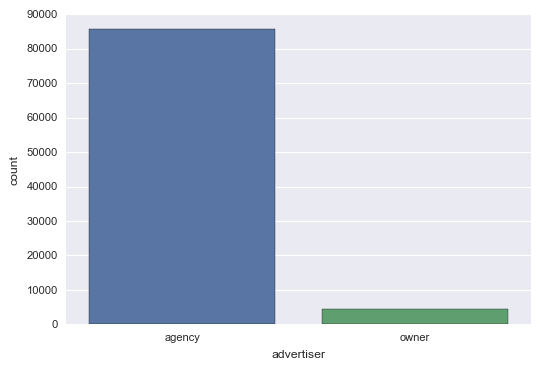

In [22]:
sns.countplot(dataset['advertiser'])

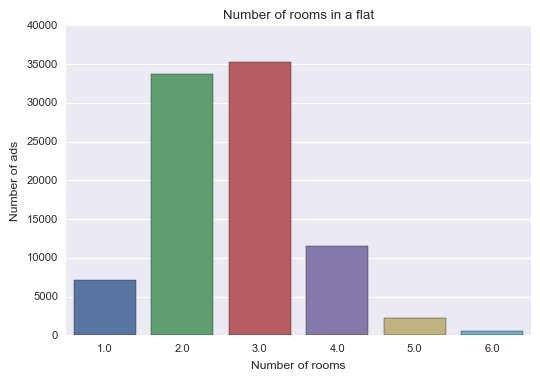

In [23]:
ax = sns.countplot(x='n_rooms',data=dataset)
ax.set(xlabel='Number of rooms', ylabel='Number of ads', title='Number of rooms in a flat')
plt.show()

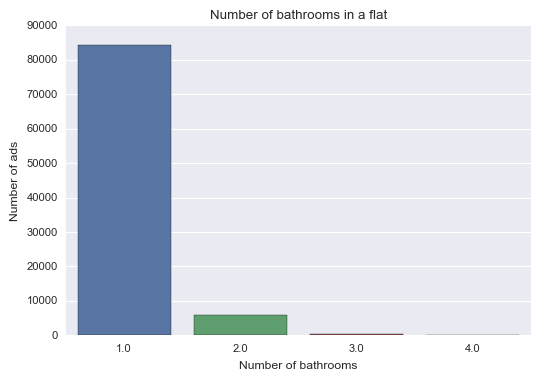

In [24]:
ax = sns.countplot(x='n_bath',data=dataset)
ax.set(xlabel='Number of bathrooms', ylabel='Number of ads', title='Number of bathrooms in a flat')
plt.show()

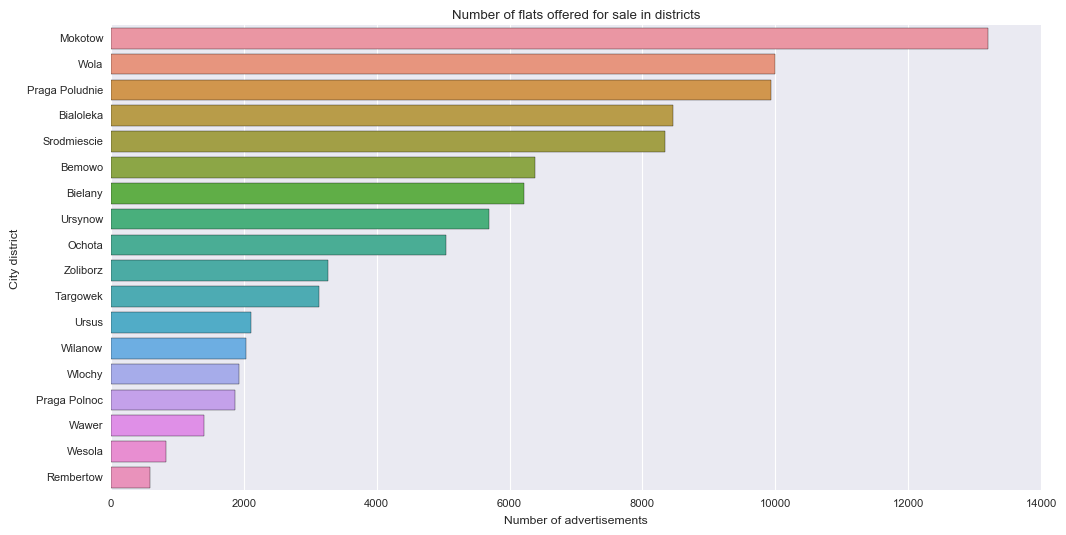

In [25]:
plt.figure(figsize=(12,6))
ranks = dataset.groupby('location')['price_m2'].count().sort_values()[::-1].index
ax = sns.countplot(y='location',data=dataset,order=ranks)
ax.set(xlabel='Number of advertisements', ylabel='City district', title='Number of flats offered for sale in districts')
plt.show()

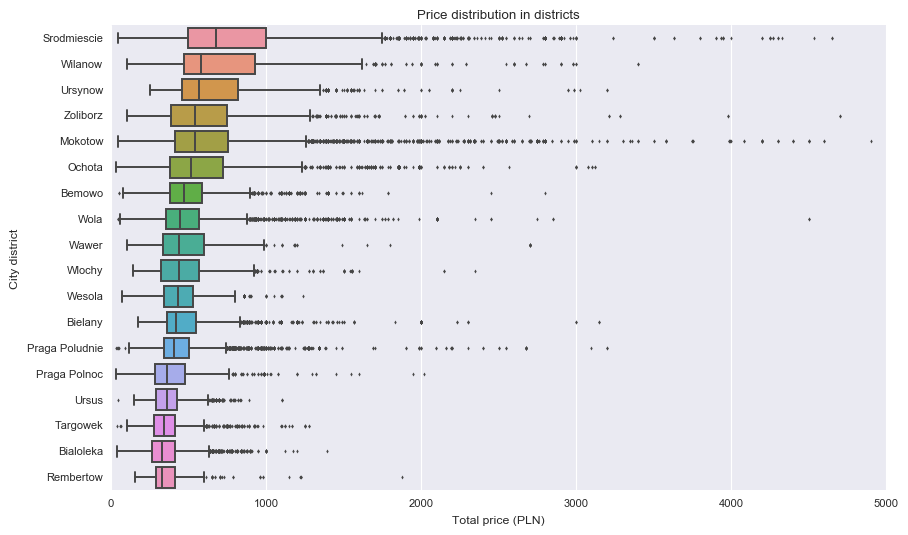

In [26]:
plt.figure(figsize=(10,6))
ranks = dataset.groupby('location')['price'].median().sort_values()[::-1].index
ax = sns.boxplot(data=dataset, y='location',x='price',fliersize=2,order=ranks)
ax.set(xlabel='Total price (PLN)', ylabel='City district', title='Price distribution in districts')
plt.show()

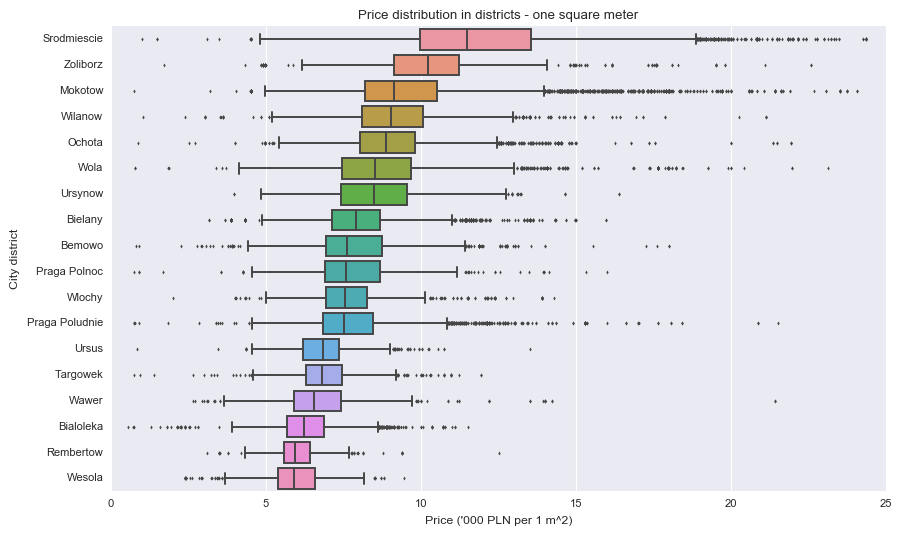

In [27]:
plt.figure(figsize=(10,6))
ranks = dataset.groupby('location')['price_m2'].median().sort_values()[::-1].index
ax = sns.boxplot(data=dataset, y='location',x='price_m2',fliersize=2, order=ranks)
ax.set(xlabel="Price ('000 PLN per 1 m^2)", ylabel='City district', 
       title='Price distribution in districts - one square meter')
plt.show()

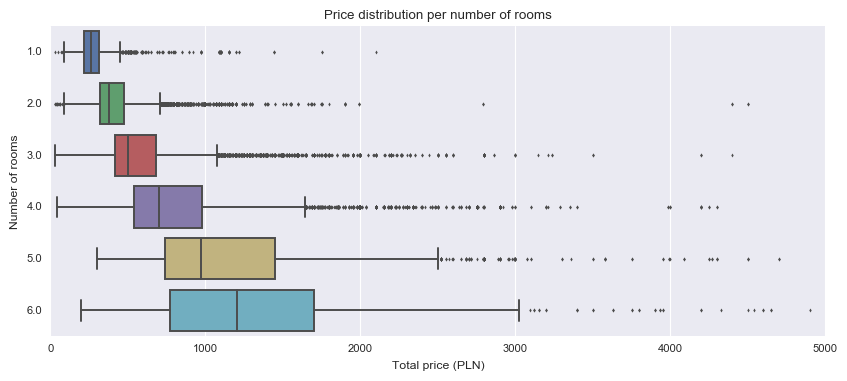

In [28]:
plt.figure(figsize=(10,4))
ax = sns.boxplot(data=dataset, y='n_rooms',x='price',fliersize=2,orient='h')
ax.set(xlabel='Total price (PLN)', ylabel='Number of rooms', title='Price distribution per number of rooms')
plt.show()

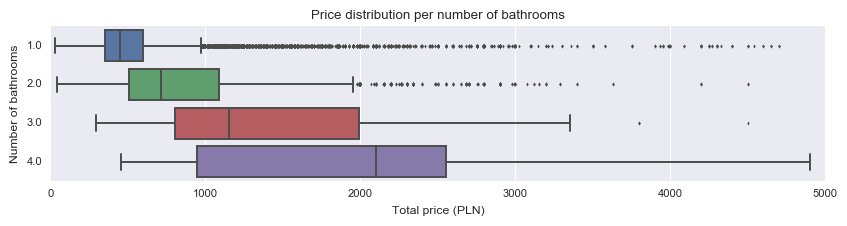

In [29]:
plt.figure(figsize=(10,2))
ax = sns.boxplot(data=dataset, y='n_bath',x='price',fliersize=2,orient='h')
ax.set(xlabel='Total price (PLN)', ylabel='Number of bathrooms', title='Price distribution per number of bathrooms')
plt.show()

# Two-room apartments analysis

In [30]:
two_room = dataset[(dataset['n_rooms']==2.0) & (dataset['price']<1200.00)]

In [31]:
two_room.describe()

,price,n_rooms,n_bath,size_m2,price_m2
count,33643.000000,33643.0,33643.000000,33643.000000,33643.000000
mean,414.795195,2.0,1.008471,47.685730,8.674279
std,143.135795,0.0,0.094838,9.748136,2.165346
min,32.900000,2.0,1.000000,21.000000,0.751786
25%,320.000000,2.0,1.000000,41.000000,7.160000
50%,380.000000,2.0,1.000000,47.000000,8.362841
75%,475.000000,2.0,1.000000,53.000000,9.729730
max,1199.900000,2.0,4.000000,134.000000,22.416667


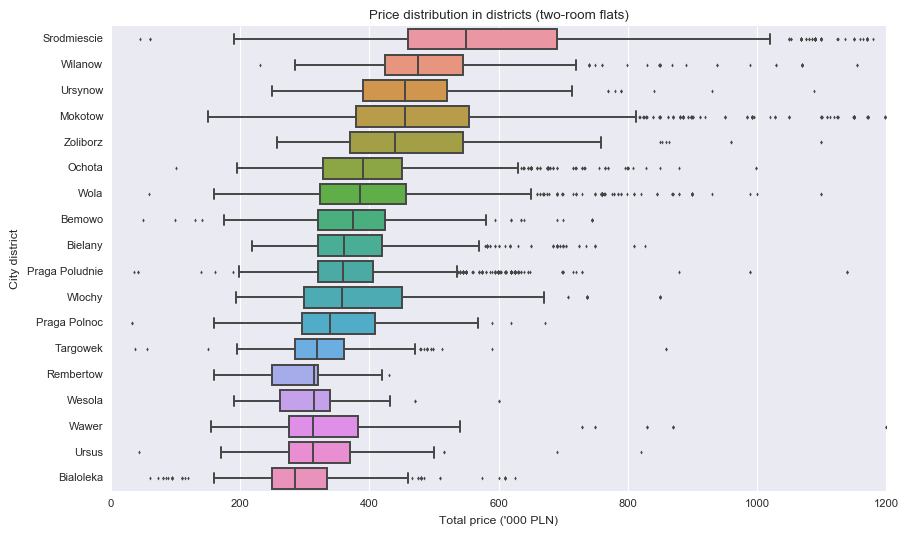

In [32]:
plt.figure(figsize=(10,6))
ranks = two_room.groupby('location')['price'].median().sort_values()[::-1].index
ax = sns.boxplot(data=two_room, y='location',x='price',fliersize=2,order=ranks)
ax.set(xlabel="Total price ('000 PLN)", ylabel='City district', title='Price distribution in districts (two-room flats)')
plt.show()

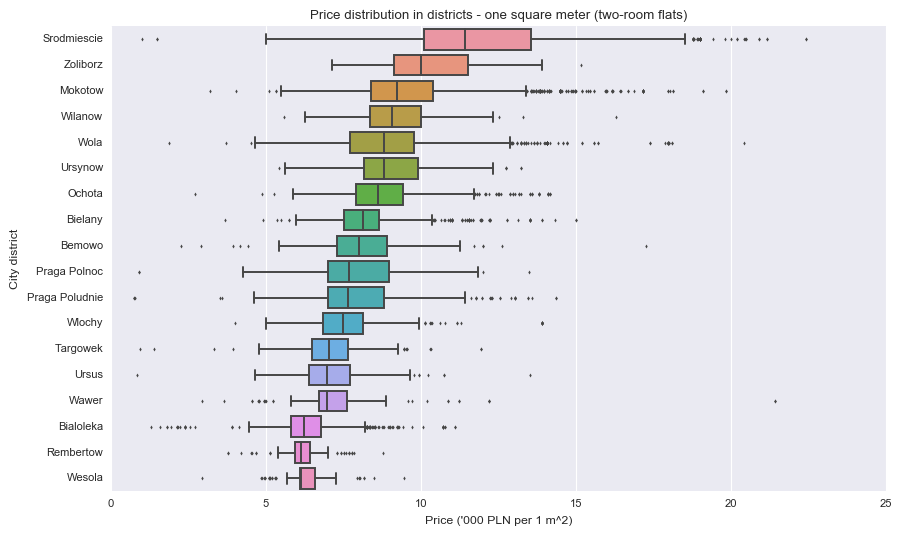

In [33]:
plt.figure(figsize=(10,6))
ranks = two_room.groupby('location')['price_m2'].median().sort_values()[::-1].index
ax = sns.boxplot(data=two_room, y='location',x='price_m2',fliersize=2, order=ranks)
ax.set(xlabel="Price ('000 PLN per 1 m^2)", ylabel='City district', 
       title='Price distribution in districts - one square meter (two-room flats)')
plt.show()

# Three-room apartments analysis

In [34]:
three_room = dataset[(dataset['n_rooms']==3.0) & (dataset['price']<1500.00)]

In [35]:
three_room.describe()

,price,n_rooms,n_bath,size_m2,price_m2
count,34840.000000,34840.0,34840.000000,34840.000000,34840.000000
mean,566.670671,3.0,1.076607,67.647331,8.278292
std,218.793384,0.0,0.269828,15.610680,2.025310
min,32.500000,3.0,1.000000,29.000000,0.532468
25%,413.427000,3.0,1.000000,57.000000,6.940299
50%,499.000000,3.0,1.000000,65.000000,7.851393
75%,665.787000,3.0,1.000000,76.000000,9.322034
max,1498.000000,3.0,4.000000,250.000000,21.949153


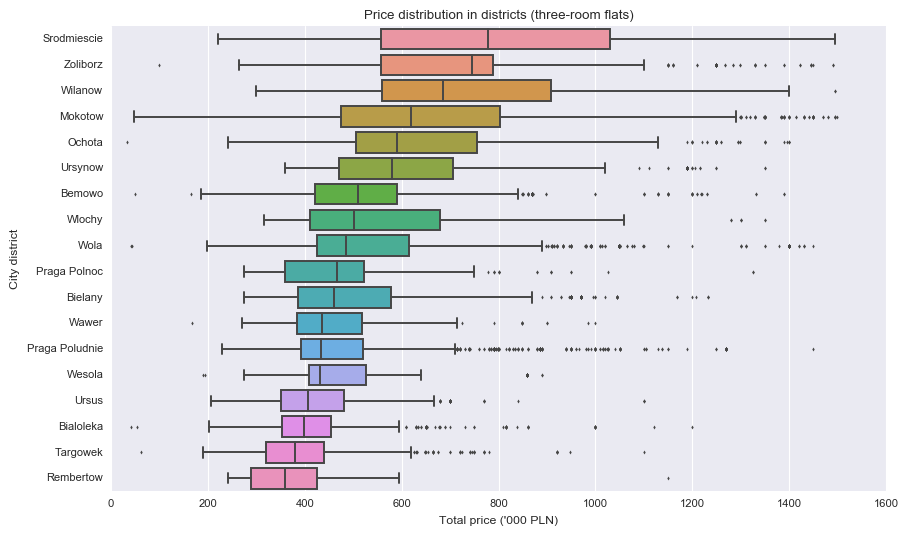

In [36]:
plt.figure(figsize=(10,6))
ranks = three_room.groupby('location')['price'].median().sort_values()[::-1].index
ax = sns.boxplot(data=three_room, y='location',x='price',fliersize=2,order=ranks)
ax.set(xlabel="Total price ('000 PLN)", ylabel='City district', title='Price distribution in districts (three-room flats)')
plt.show()

## Linear regression model

In [37]:
district_data = dataset[dataset['location'] == 'Mokotow']

In [38]:
district_data = district_data[['price','n_rooms','size_m2','parking','n_bath']]

In [39]:
district_data.corr()

,price,n_rooms,size_m2,n_bath
price,1.000000,0.570893,0.862130,0.286221
n_rooms,0.570893,1.000000,0.749481,0.298992
size_m2,0.862130,0.749481,1.000000,0.342541
n_bath,0.286221,0.298992,0.342541,1.000000


In [40]:
parking = pd.get_dummies(district_data['parking'],prefix='parking')
model_dataset = pd.concat([district_data,parking],axis=1)
model_dataset.drop(['parking','parking_no'],axis=1,inplace=True)
model_dataset.describe()

,price,n_rooms,size_m2,n_bath,parking_basement,parking_garage,parking_street
count,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000,13203.000000
mean,666.151845,2.646065,66.964856,1.071878,0.065894,0.075286,0.214724
std,452.918187,0.871760,30.178193,0.281854,0.248106,0.263862,0.410646
min,47.000000,1.000000,13.000000,1.000000,0.000000,0.000000,0.000000
25%,415.000000,2.000000,48.000000,1.000000,0.000000,0.000000,0.000000
50%,540.000000,3.000000,60.000000,1.000000,0.000000,0.000000,0.000000
75%,755.000000,3.000000,80.000000,1.000000,0.000000,0.000000,0.000000
max,4900.000000,6.000000,294.000000,4.000000,1.000000,1.000000,1.000000


In [41]:
X = model_dataset.drop('price',axis=1)
y = model_dataset['price']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [44]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
coeffs = pd.DataFrame(data=lm.coef_,index=X.columns, columns=['Coefficient'])
coeffs.sort_values(by='Coefficient',inplace=True)

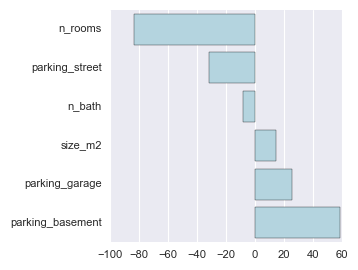

In [45]:
plt.figure(figsize=(3,3))
sns.barplot(data=coeffs.transpose(),orient='h',color='lightblue')
plt.show()

In [46]:
pred = lm.predict(X_test)

In [47]:
lm.score(X_test,y_test)

0.75183076707320085

## Models for all districts

In [48]:
districts = list(dataset['location'].unique())

In [49]:
districts

['Bielany',
 'Mokotow',
 'Zoliborz',
 'Bemowo',
 'Praga Poludnie',
 'Ochota',
 'Wawer',
 'Bialoleka',
 'Praga Polnoc',
 'Wilanow',
 'Srodmiescie',
 'Ursynow',
 'Wola',
 'Ursus',
 'Targowek',
 'Wesola',
 'Wlochy',
 'Rembertow']

In [50]:
r2_dict = dict()
model_dict = dict()

In [51]:
for district in districts:
    district_data = dataset[dataset['location'] == district]
    district_data = district_data[['price','n_rooms','size_m2','parking','n_bath']]
    parking = pd.get_dummies(district_data['parking'],prefix='parking')
    model_dataset = pd.concat([district_data,parking],axis=1)
    model_dataset.drop(['parking','parking_no'],axis=1,inplace=True)
    X = model_dataset.drop('price',axis=1)
    y = model_dataset['price']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    coeffs = pd.DataFrame(data=lm.coef_,index=X.columns, columns=['Coefficient'])
    coeffs.sort_values(by='Coefficient',inplace=True)
    r2_dict[district] = lm.score(X_test,y_test)
    model_dict[district] = coeffs

In [52]:
r2 = pd.DataFrame(pd.Series(r2_dict),columns=['R^2 Score'])
r2.sort_values(by='R^2 Score',ascending=False)

,R^2 Score
Zoliborz,0.849602
Praga Polnoc,0.827439
Ochota,0.826701
Ursynow,0.825120
Wlochy,0.823939
Targowek,0.818102
Bialoleka,0.785058
Ursus,0.778364
Wola,0.773210
Bemowo,0.765593


In [54]:
regression_parameters = pd.DataFrame(pd.Series(model_dict))
regression_parameters.loc['Bemowo'][0]

,Coefficient
parking_street,-51.545895
n_rooms,-32.009382
parking_garage,7.259334
size_m2,8.331652
n_bath,13.534965
parking_basement,18.170777
